# Part 1: Theory

Covers the statistical basics, that are needed for the applications in part 2.

# 1.1) Classical Summary Statistics

Problem: Given a bunch of datapoints:

* Characterize the distribution in one or two values
* Characterization should be robust to outliers

Equivalent of an elevator pitch for a data sets.

Problem: This is impossible. But let's see how far we get!

## The Mean Value

The _mean value_ of $X=[x_1, \dots, x_n]$ is defined as

$$ \mu = mean(X) = \frac{1}{n} \sum_{i=1}^n x_i. $$

- Represnets center of mass
- If the values are close together this is a good representative

## Calculating Mean Values


In [2]:
def mean(X):
    return float(sum(X)) / len(X)

In [3]:
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot
def mark(m,height=1,style='r'):
    plt.plot([m,m],[0,height],style)

def plot_mean(X):
    plt.figure(figsize=(14,1))
    sns.rugplot(X, color='grey', height=1)
    mark(mean(X))

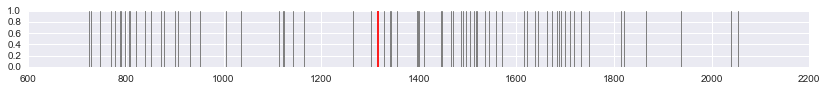

In [290]:
# Mean value of some request rates
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
plot_mean(X)

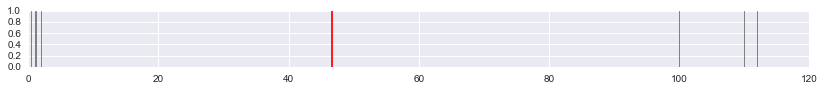

In [5]:
# Mean values can be atypical
plot_mean([1,2,0.4,1.2,100,110,112])

(500, 2200)

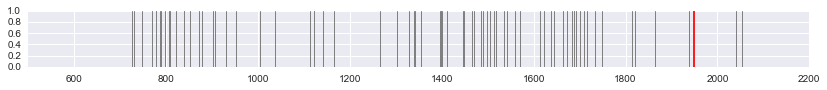

In [6]:
# Mean values are easily affected by outliers
plot_mean(np.append(X,[50000]))
plt.xlim([500,2200])

# Mean values are mergable

Mean values can be aggregated, as follows:

Let $X$ and $Y$ be two datasets of size $len(X)=n$ and $len(Y)=m$.
Denote the merged dataset by 

$$merge(X, Y) = [X[1],...,X[n], Y[1],...,Y[m]].$$

Then the mean value of the merged dataset can be expressed as:

$$mean(merge(X,Y)) = \frac{n}{n+m} \cdot mean(X) + \frac{m}{n+m} \cdot mean(Y)$$

Remarks:

* Expressions of the form $\sum w_i X[i]$, with $\sum w_i = 1$ are called _weighted means_.

* We have just seen that the means of merged datasets can be recoverd as weighted mean over their mean value.

* Exercise: How do you aggregate a greater number of sample sets: $X_1, ..., X_k$ ?

In [45]:
# Test

print "RHS", mean([1,2,3,10,11])
print "LHS", (3*mean([1,2,3]) + 2*mean([10,11]))/5

RHS 5.4
LHS 5.4


## Take Aways

* Mean values are an important technique for summarizing data

* Mean values can be easily disturbed by outliers.  
  We will meet robust alternatives (e.g. median) later.

* Mean values are _mergable_

# Deviation Measures

1. The _maximal deviation_ is defined as

$$ maxdev(x_1,\dots,x_n) = max \{ |x_i - \mu| \,|\, i=1,\dots,n\}.$$

2. The _mean absolute deviation_ is defined as

$$ mad(x_1,\dots,x_n) = \frac{1}{n} \sum_{i=1}^n |x_i - \mu|.$$

3. The _standard deviation_ is defined as

$$ \sigma = stddev(x_1,\dots,x_n) =  \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2}.$$


* Measure the 'typical' displacement from the mean value.
* Standard deviation is popular because it has extremely nice mathematical properties.

In [46]:
def max_dev(X):
    m = mean(X)
    return max(abs(x - m) for x in X)

def mad(X):
    m = mean(X)
    return sum(abs(x - m) for x in X) / float(len(X))

def stddev(X):
    m = mean(X)
    return math.pow(sum((x - m)**2 for x in X) / len(X), 0.5)

In [47]:
# Plotting helper function
def plot_mean_dev(X, m, s, new_canvas=True):
    print "mean = ", m
    print "dev  = ", s
    if new_canvas: plt.figure(figsize=(14,1))
    sns.rugplot(X, color='grey', height=0.5)
    plt.plot([m,m],[0,1],'r-' )
    plt.plot([m-s,m-s],[0,1],'b-')
    plt.plot([m+s,m+s],[0,1],'b-')
    plt.plot([m-s,m+s],[0.5,0.5],'b--')
    if new_canvas: plt.show()

Maximal deviation
mean =  1316.30863471
dev  =  738.072957089


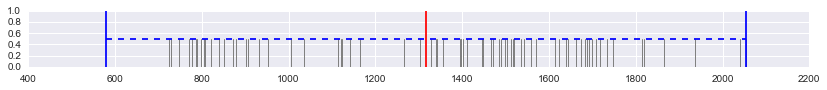

Standard Deviation
mean =  1316.30863471
dev  =  374.572363954


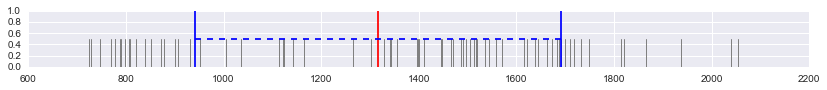

Mean Absolute Deviation
mean =  1316.30863471
dev  =  327.4656915


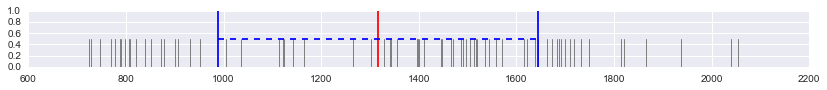

In [48]:
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
    
print "Maximal deviation"
plot_mean_dev(X,mean(X),max_dev(X))

print "Standard Deviation"
plot_mean_dev(X,mean(X),stddev(X))

print "Mean Absolute Deviation"
plot_mean_dev(X,mean(X),mad(X))

mean =  0.0434588558476
dev  =  1.00890270084


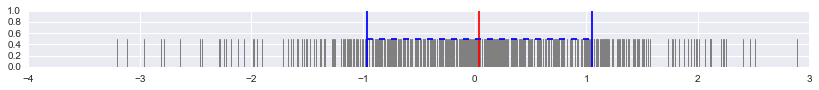

In [49]:
# Standard deviation is a good deviation for normal distributed data
X = [ np.random.normal() for x in range(500) ]
plot_mean_dev(X,mean(X),stddev(X))

Maximal deviation
mean =  0.442573708431
dev  =  199.557426292


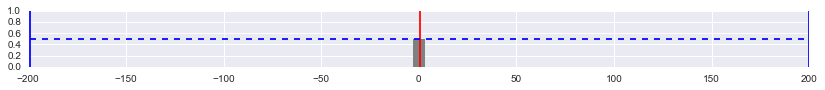

Standard Deviation
mean =  0.442573708431
dev  =  8.98121293201


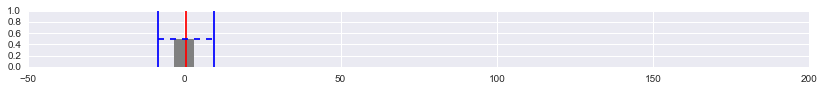

Mean Absolute Deviation
mean =  0.442573708431
dev  =  1.25622026616


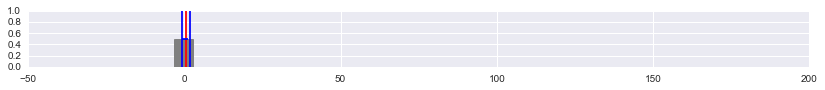

In [50]:
# Large effect on Outliers
X = X + [200]

print "Maximal deviation"
plot_mean_dev(X,mean(X),max_dev(X))

print "Standard Deviation"
plot_mean_dev(X,mean(X),stddev(X))

print "Mean Absolute Deviation"
plot_mean_dev(X,mean(X),mad(X))

## Caution with Standard Deviation

- Everybody Learns about standard deviation in school
- Beautiful mathematical properties!
- Everybody knows 
  - "68% of data falls within 1 std-dev of the mean"
  - "95% falls within 2 std-dev of the mean"
  - "99.7" falls within 3 std-dev of the mean"
* "Problem is: this is utter nonsense". Only true for normally distributed data.

* Not good for measuring outliers!


_Source:_ Janert - Data Analysis with Open Source Tools

## War Story:

- Looking at SLA for DB response times
- Outlier defined as value larger than $\mu + 3\sigma$
- Look at code: Takes '0.3' percentile!
- So always have outliers.
- And 0.3-percentile was way too large (hours of latency).
- Programmer changed code for 1%, 5%, 10% quantiles.
- Finally handcoded a threshold
- The SLA was never changed

Source: Janert - Data Analysis with Open Source Tools

## Takeaway

* Don't use the standard-deviation if you can avoid it
* If you need a deviation measure use MAD or IQR (cf. later):
  - Simple to calculate
  - Simple to interpret
  - Not mergable

# 1.2) Percentiles

* Classical summary statistics good for describing the body of the distribution
* Need information about the tail of the distributions, e.g. for writing good SLAs
* Determine outliers in a dataset

## Inverse Percentiles

The inverse percentile y of a dataset $X$, is defined as:

$$ IP(y, X) = \# \{ i \, | \, x_i \leq y \} / \# X * 100 $$

So IP(y, X) = the percentage of samples that are lower than $y$.

**Properties**

* $0 \leq IP(y, X) \leq 100$, dimensionless percentage value
* $IP$ is monotonically increasing in $y$

In [338]:
def IP(y,X):
    lower_count = 0
    for x in X:
        if x <= y: lower_count += 1
    return float(lower_count) / len(X)

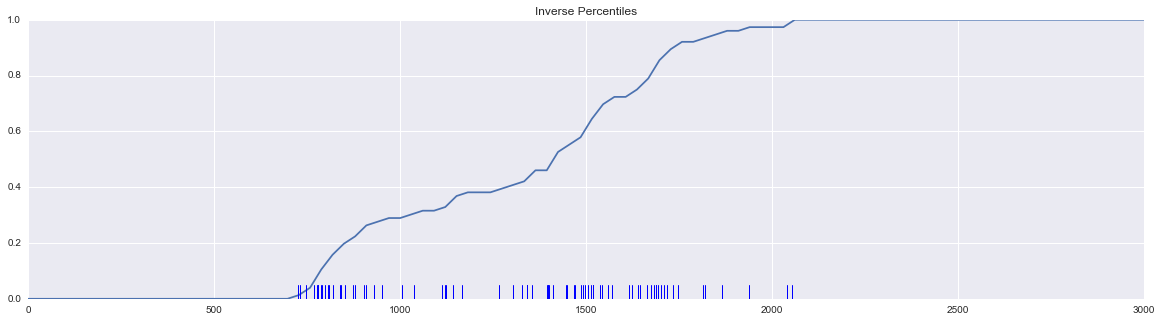

In [226]:
# Example
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,5)
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]

grid = np.linspace(0,3000,100)
plt.figure(figsize=(20,5))
plt.plot(grid, [IP(y,X) for y in grid])
plt.title("Inverse Percentiles")
sns.rugplot(X)

## Percentiles

* Complement or Inverse to Inverse Percentiles:
  - IP: The ratio of samples was below a value $y$ was $?\%$
  - Percentile: 90% of all queries where faster than $?$

* The definition is a little involved so cover examples first

Examples:

* The minimum is a 0%-percentile
* A median is a 50%-percentile
* The maximum is a 100%-percentile

Special names:

* Quartiles: $0,25,50,75,100$%-percentiles
* Quantiles: The $r$-quantile is the $r*100$-percentile $0<r<1$.

## Medians

A _median value_ for $x_1, \dots, x_n$ is number $m$ such that
  
 $$ \# \{ i \,|\, x_i \lt m \} = \# \{ i \,|\, x_i \gt m \}. $$

So the number of samples smaller than $m$ is equal to the number of samples larger than $m$.
(Both should be roughly $n/2$).
  
Remark:

* A Median always exists
* Median is not always unique (When is it?)
* Can be computed in linear time (using quickselect) like the mean

In [339]:
# Computation of the median

#TODO? Implement Check median?

def median_range(X):
    S = sorted(X)
    n = len(X) # S[0] < ... < S[n-1]
    lower_mid = int(math.floor((n-1)/2.))
    upper_mid = int(math.ceil((n-1)/2.))
    return (S[lower_mid], S[upper_mid])

In [340]:
def plot_median_range(X):
    plt.figure(figsize=(14,1))
    a, b = median_range(X)
    sns.rugplot(X, color="green", height=0.5)
    plt.plot([a,a],[0.5,1],'r-')
    plt.plot([b,b],[0.5,1],'r-')
    plt.plot([a,b],[0.5,0.5],'r--')
    plt.title("Median Range: {:.3f} .. {:,.3f}".format(p, a,b))
    plt.ylim([0,1])

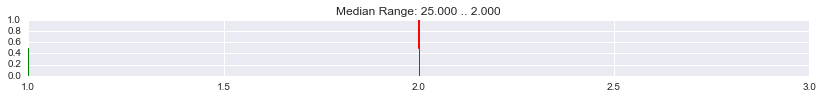

In [225]:
plot_median_range([1,2,3])

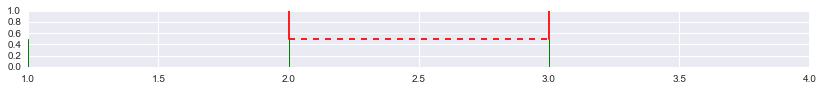

In [172]:
plot_median_range([1,2,3,4])

Median range (1398.07824707031, 1401.24816894531)


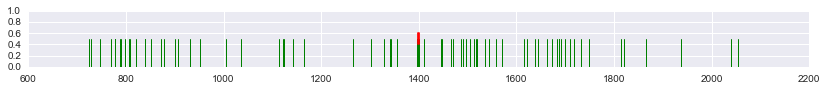

In [142]:
print "Median range", median_range(X)
plot_median_range(X)

Median range (1401.24816894531, 1401.24816894531)


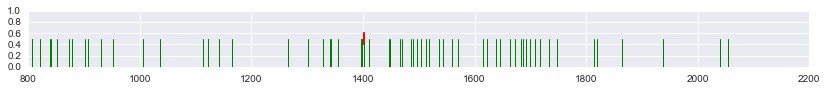

In [143]:
XO=np.append(X,[10000])
print "Median range", median_range(XO)
plot_median_range(XO)
plt.xlim(800,2200)
plt.show()

# Truncated Means

# General Definition of Percentiles

Pick a number $0\leq p \leq 100$. A $p$%-percentile for $X$ is a value $y$ such that,

$$ \#\{i \,|\, X[i] \lt y \} \leq \frac{p}{100} \cdot n $$

and

$$ \#\{i \,|\, X[i] \gt y \} \leq \frac{100-p}{100} \cdot n $$

Roughly speaking, $y$ divides $X$ in $p\%$ samples that are lower than $y$ and $(100-p)\%$ samples that are larger than $y$.

Remarks:

* Quantiles always exists
* Non unique (like median)
* Lot's of ways to choose a quantile function, i.e. interpolate between $s_a$ and $s_b$ cf.  
  http://en.wikipedia.org/wiki/Quantile#Estimating_the_quantiles_of_a_population

In [341]:
# Computation of Quantiles

def percentile_range(p,X):
    q = p/100.0
    S = sorted(X)
    n = len(X)
    upper_d = int(math.ceil(q * (n + 1)))
    lower_d = int(math.floor(q * (n + 1)))
    # edge cases
    if upper_d == 0:   upper_d = 1
    if upper_d == n+1: upper_d = n
    if lower_d == 0:   lower_d = 1
    if lower_d == n+1: lower_d = n
    return (S[lower_d-1], S[upper_d-1])

def percentile(p,X):
    a,b = percentile_range(p,X)
    return (a+b)/2 # mid point percentile. One choice!


In [342]:
def mark_range(a,b):
    plt.plot([a,a],[0.5,1],'r-')
    plt.plot([b,b],[0.5,1],'r-')
    plt.plot([a,b],[0.75,0.75],'r--')

def plot_percentile_range(p,X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color="green", height=0.5)
    a,b = percentile_range(p,X)
    mark_range(a,b)
    plt.title("{:n}%-Percentile Range: {:.3f} .. {:,.3f}".format(p, a,b))
    plt.ylim([0,1])

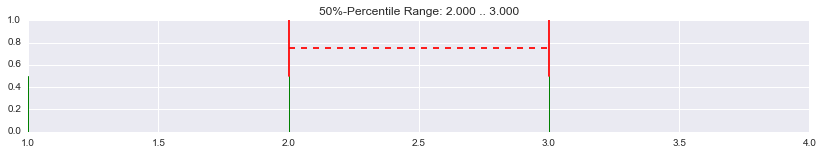

In [343]:
plot_percentile_range(50,[1,2,3,4])

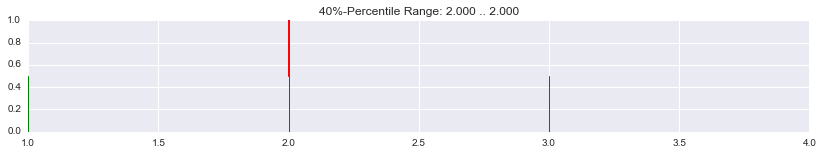

In [344]:
plot_percentile_range(40,[1,2,3,4])

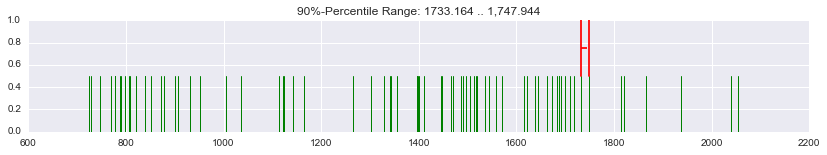

In [345]:
plot_percentile_range(90,X)

# IQR and Outliers

The interquartile range of a sample X is defined as:

`IQR(X) = P(75,X) - P(25,X)`

It is a robust measure for variance of the data. Good alternative to standard / mean deviation.

**Def.** (Tukey, 1969) a k-outlier is a data point X which is either

* larger than `P(75) + k * IQR(X)` or
* smaller than `P(25) - k * IQR(X)`.

An outlier (without k) is an 1.5-outlier.

In [291]:
def IQR(X): return percentile(75,X) - percentile(0.25,X)

def outliers(X, k=1.5):
    iqr = IQR(X)
    lower_bound = percentile(25,X) - k * iqr
    upper_bound = percentile(75,X) + k * iqr
    out = []
    for x in X:
        if x < lower_bound: out.append(x)
        if x > upper_bound: out.append(x)
    return out

In [297]:
def outlier_plot(X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color="green", height=0.5)
    a,b = percentile(25,X), percentile(75,X)
    O = outliers(X)
    print "IQR:", b-a
    print "Outlier count:", len(O)
    mark_range(a,b)
    for o in O:
        plt.plot([o,o],[0.7,0.8],'b--')
    plt.ylim([0,1])

IQR: 725.891693115
Outlier count: 0


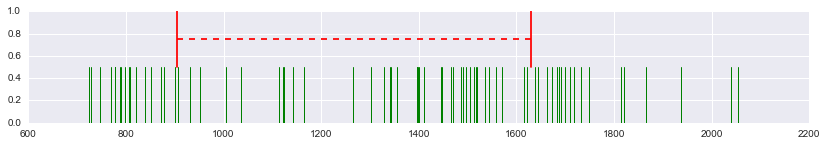

In [298]:
outlier_plot(X)

IQR: 11.6
Outlier count: 9


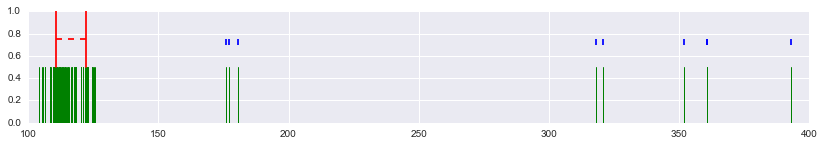

In [299]:
Y = np.genfromtxt("DataSets/WebLatency.csv", delimiter=",")[:,2][:100]
outlier_plot(Y)

# Tukey's Boxplots

Show:

* Median
* Box around 0.25 and 0.75 Quantiles
* "whiskers" from min to max
* points for outliers

Allows visual clues:

* Where is the data concentracted?
* How far is it spread?
* How skew is the data?

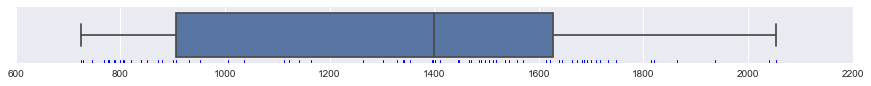

In [310]:
# Tukey Boxplots show outliers as 'points' outside the whiskers

# Web-request dataset
plt.figure(figsize=(15,1))
sns.boxplot(x=X, vert=False)
sns.rugplot(X)
plt.show()

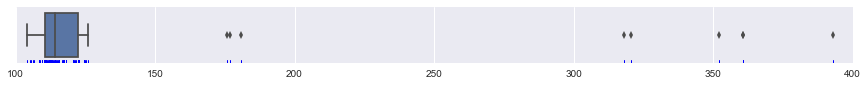

In [311]:
# Latency Dataset

plt.figure(figsize=(15,1))
sns.boxplot(x=Y, vert=False)
sns.rugplot(Y)
plt.show()

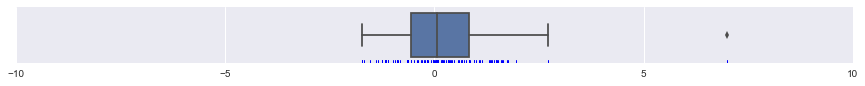

In [312]:
# Normal data
N = [np.random.normal() for x in xrange(100)]

# Add outlier
NO = N + [7]

plt.figure(figsize=(15,1))
sns.rugplot(NO)
sns.boxplot(x=NO, vert=False).set_xlim(-10,10)
plt.show()

# Note, that IQR and Median are not affected by the outlier!

# 1.3) Histograms

* Basic Idea: Use area to compare sample ratios, instead of point counts
* Easier to answer questios like: "How many voters are older than 30, when presented with a histogram, than a table or a rugplot."
* Both a visualization method and a data-storage format

# Building your own Histogram

1. Define value range of histogram `bin_min`, `bin_max`
2. Divide range into bins `bin[k], ..., bin[k]`
3. The bins may have variying width 
4. Count the number of samples in each bin `sample_count[k]`
5. Draw a rectangle for each bin with height:
   - `h[k] = sample_count[k]` -- non normalized 
   - `h[k] = sample_count[k] / bin_width[k]` -- normalized case

In [316]:
import numpy as np
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]

# Step 1: Represent bins via list of left-edges
bin_left = [
    500, 700, 800, 900, 1000, 1500, 1800, 2000, 2200
]

bin_min = bin_left[0]
bin_max = bin_left[-1]
bins = [ [bin_left[i-1],bin_left[i]] for i in xrange(1, len(bin_left)) ]

print "Bins: ", bins

Bins:  [[500, 700], [700, 800], [800, 900], [900, 1000], [1000, 1500], [1500, 1800], [1800, 2000], [2000, 2200]]


In [317]:
# Step2: Count number of samples in bins
def count(X, bins):
    def findBin(x, bins):
        for i, bin in enumerate(bins):
            left, right = bin
            if left <= x and x < right:
                return i
        return None
    
    count = [0] * len(bins)
    for x in X:
        i = findBin(x, bins)
        if i != None:
            count[i] += 1

    return count

sample_count = count(X, bins)

print "Counts:", sample_count

Counts: [0, 10, 8, 4, 25, 23, 4, 2]


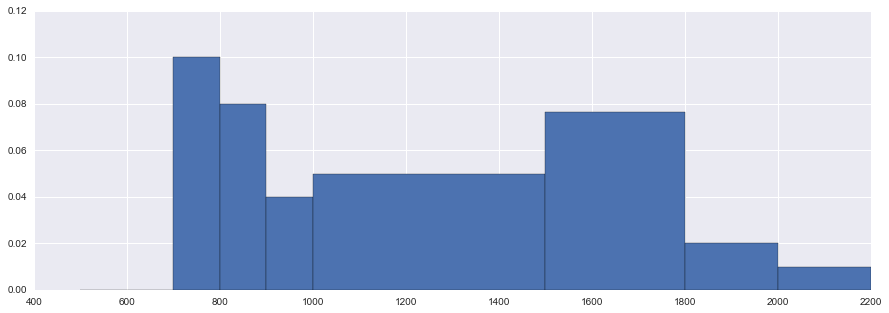

In [318]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Step3: Plot bar chart
def my_hist(X, bins, normed=True, **kwargs):
    bin_left = [ l for l, r in bins ]
    bin_width = [ r-l  for l,r in bins ]
    bin_height = [ 
        float(c) / w if normed else c 
        for c,w in zip(count(X, bins), bin_width)
    ]
    plt.bar(bin_left,width=bin_width,height=bin_height, **kwargs)

plt.figure(figsize=(15,5))
my_hist(X,bins)

In [319]:
def plot_hist(X,  bin_min, bin_max, bin_width):
    plt.figure(figsize=(15,5))
    bins =[ [i, i+bin_width] for i in np.arange(bin_min, bin_max, bin_width) ]
    my_hist(X,bins)
    print "Histogram with bin_width ", bin_width
    plt.show()

## How bin choices affect the apperance

Histogram with bin_width  5


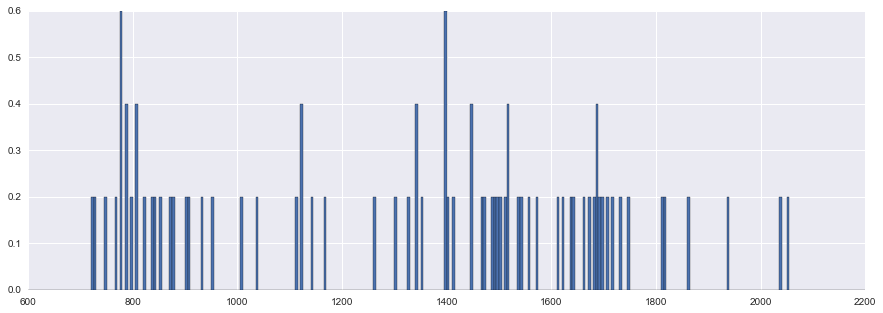

In [321]:
bin_min = 600
bin_max = 2200
plot_hist(X, bin_min, bin_max, 5)

Histogram with bin_width  50


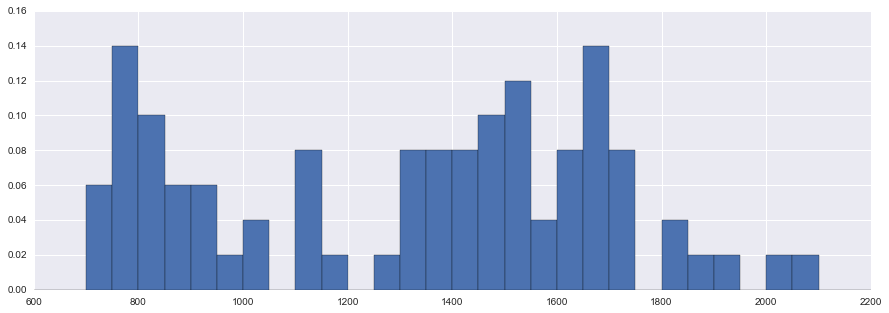

In [323]:
plot_hist(X, bin_min, bin_max, 50)

Histogram with bin_width  2000


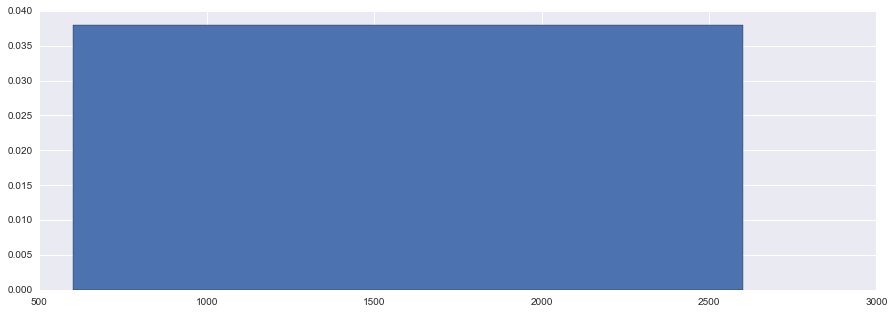

In [324]:
plot_hist(X, bin_min, bin_max, 2000)
# -> Only the total count is displayed

## Common bin-width choices

Remarks:
* Can convert `bin_count` and `bin_width` using relation $$ bin\_max - bin\_min = bin\_count \cdot bin\_width.$$

* Choices `bin_min=min(X)` and `bin_max=max(X)` are common. But: dependence on input data.

Choices for bin-width:

* Excel: Let $n$ be the number of samples, then:

  $$ bin\_count = \sqrt{n} $$

* Scott's normal reference rule

  $$ bin\_width = \frac{3.5 \sigma}{n^{1/3}} $$

  where $\sigma$ is the standard deviation (cf. later).
  This is optimal for random samples of normally distributed data, in a certain sense.

* Freedman–Diaconis rule

  $$ bin\_width = \frac{2 IQR}{n^{1/3}} $$
  
  where IQR is the inter-quartile range (cf. later). Like Scott's rule but more robust agains outliers.



# A pragmatic choice: HDR Histograms

Example: A decimal HDR Histogram with precision=2 has bin boundaries:
  
    .... 1.0,  1.1,  1.2, ... 1.9,  2.0,  2.1, ...., 9.9; --- bin width = 0.1
         10.0, 11.0, 12.0 ... 19.0, 20.0, 21.0 ...., 99 ; --- bin width = 1
         ...

** Properties: **
* Captures large part of float range
* Bin boundaries do not depend on data! -> Can aggregate counts!
* Bin width increase with growing values
* Allows compact memory representation
* Implementation available at http://hdrhistogram.org/

In [330]:
import math
def HDR_bin_width(x):
    if x == 0: return 0
    sign = x / abs(x)
    return sign * 10 ** ( math.floor(math.log10(abs(x)) - 1 ) )

def HDR_bin_left(x):
    w = HDR_bin_width(x)
    if w == 0: return 0
    return math.floor(x / w) * w

def HRD_bin_right(x):
    return bin_left(x) + bin_width(x)

In [331]:
def HDR_hist(X):
    count = {}
    for x in X:
        l = HDR_bin_left(x)
        count[l] = count.get(l,0) + 1
    bin_left = sorted(count.keys())
    bin_width = [ HDR_bin_width(l) for l in bin_left ]
    bin_height = [ count[l] / HDR_bin_width(l)
        for l in bin_left
    ]
    plt.figure(figsize=(15,5))
    plt.bar(bin_left,width=bin_width,height=bin_height)

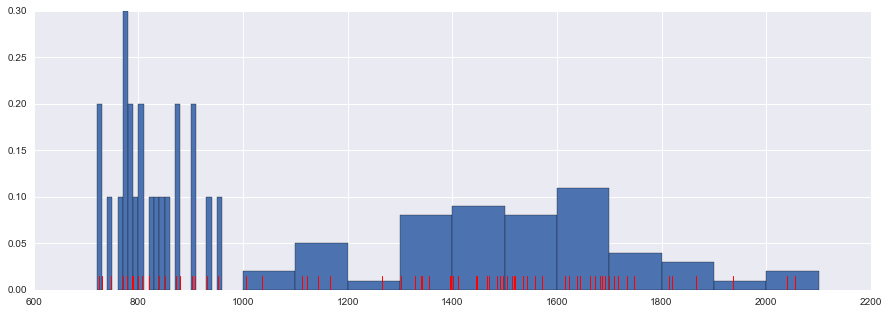

In [337]:
HDR_hist(X)
sns.rugplot(X, color="red")